# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

	Based on the box plots of the tumour volume for each treatment group, the effectiveness of Capomulin seems comparable to Ramicane; it is significantly more effective than Infubinol and Ceftamine.

	There is only one outlier in the data set for the top drugs; thus, the study’s results are very reliable.

	There is a positive correlation between mouse weight and average tumour volume; it is 0.84. Therefore the heavier the mouse is, the less drug effective.


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_complete = pd.merge(study_results, mouse_metadata, how="right", on=["Mouse ID","Mouse ID"])

#drop duplicates columns
new_study_mouse = pd.DataFrame.drop_duplicates(mouse_metadata_complete,subset=["Mouse ID"])

# Display the data table for preview
new_study_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice
new_study_mouse["Mouse ID"].count()

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicated = mouse_metadata_complete[mouse_metadata_complete.duplicated(['Mouse ID','Timepoint'])]
mouse_duplicated["Mouse ID"].unique()


array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_metadata_complete.loc[mouse_metadata_complete["Mouse ID"] == str(mouse_duplicated.iloc[0,0]),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = new_study_mouse.drop_duplicates("Mouse ID")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
drop_mouse = mouse_metadata_complete[mouse_metadata_complete["Mouse ID"] == str(mouse_duplicated.iloc[0,0])].index
clean_mouse_data = mouse_metadata_complete.drop(drop_mouse)
clean_mouse_data.reset_index(inplace=True)
pd.DataFrame([len(clean_mouse_data["Mouse ID"].unique())])



,0
0,248


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = clean_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_std = clean_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem = clean_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regimen_df = pd.DataFrame({
    'Mean Tumor Vol': regimen_mean,
    'Median Tumor Vol': regimen_median,
    'Tumor Volume Variance': regimen_variance,
    'Tumor Volume Std. Dev': regimen_std,
    'Tumor Volume Std. Err.': regimen_sem,
})
regimen_df

,Mean Tumor Vol,Median Tumor Vol,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregations = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}

regimen_agg = clean_mouse_data.groupby('Drug Regimen').agg(aggregations)
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

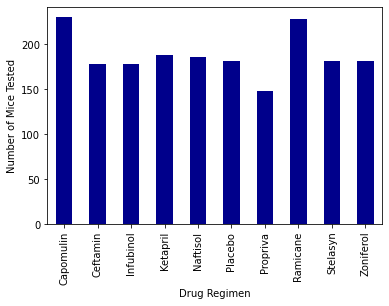

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = clean_mouse_data.groupby("Drug Regimen").count()["Mouse ID"]
total_mice_chart = total_mice.plot(kind="bar", title= "", legend=False, color= "darkblue")
total_mice_chart.set_ylabel("Number of Mice Tested")
plt.show()


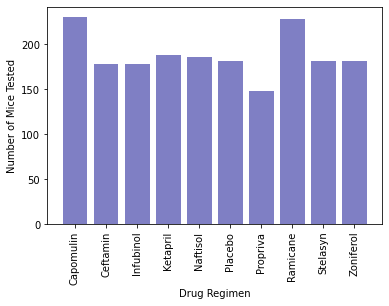

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_mice_df = pd.DataFrame(total_mice)
total_mice_df = total_mice_df.iloc[:,0]
x_axis = np.arange(len(total_mice_df))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, total_mice_df, color = "darkblue", alpha=0.5, align="edge")
plt.xticks(tick_locations, total_mice_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

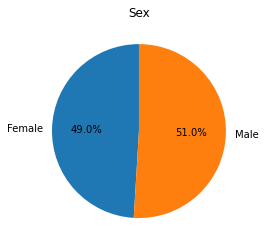

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_mouse_data.groupby("Sex").count()["Mouse ID"]
mice_sex_chart = mice_sex.plot(kind="pie", label= "", title="Sex", labels=mice_sex.index, autopct='%1.1f%%',legend=False, startangle=90)

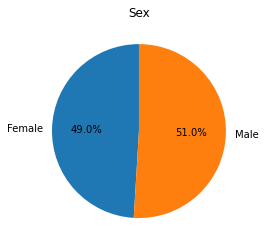

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_df = pd.DataFrame(mice_sex)
fig1, ax1 = plt.subplots()
ax1.pie(mice_sex_df["Mouse ID"], labels=mice_sex.index, autopct='%1.1f%%', startangle=90, )
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.DataFrame(clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max())
merged_df = pd.merge(final_tumor_vol,clean_mouse_data,on=("Mouse ID","Timepoint"))

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df = merged_df.loc[merged_df["Drug Regimen"] == treatment,["Tumor Volume (mm3)"]]

    df.sort_values("Tumor Volume (mm3)")
    df.reset_index(inplace=True)
    # add subset 
    data.append(df["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = df.quantile([0.25,0.75])
    l = quartiles.loc[0.25]
    u = quartiles.loc[0.75]
    iqr = u-l
    lower_bound = l-iqr*1.5
    upper_bound = u+iqr*1.5
    outliers = df[(df<lower_bound)|(df>upper_bound)]
    outliers.drop("index",axis = 1,inplace=True)
    outliers.dropna(inplace=True)
    if outliers.shape[0]>0:
        print(f"treatment {treatment} has outlier")


treatment Infubinol has outlier


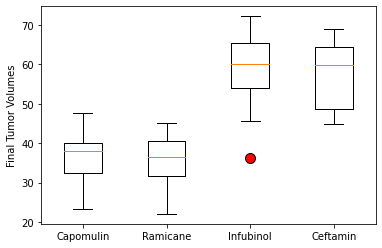

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volumes")
ax1.set_xticklabels(treatments)
outlier = dict(markerfacecolor="red", markersize = 10)
bp = ax1.boxplot(data, flierprops=outlier)
plt.show()
# plt.boxplot(data);

## Line and Scatter Plots

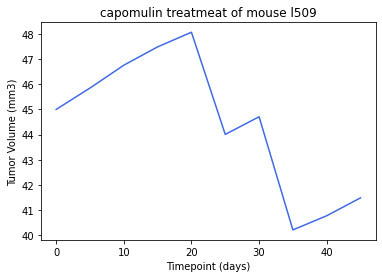

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin",:]
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]
time_point = capomulin_mouse["Timepoint"]
fig1,ax1, = plt.subplots()
plt.title("capomulin treatmeat of mouse l509")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Timepoint (days)")
ax1.plot(time_point, tumor_vol, color="royalblue")
plt.show()


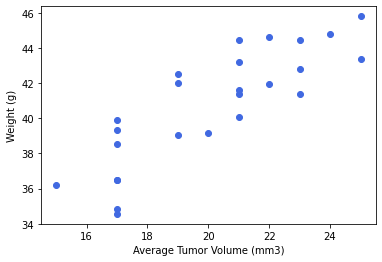

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_regimen = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capo_regimen["Weight (g)"],capo_regimen["Tumor Volume (mm3)"],color="royalblue")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


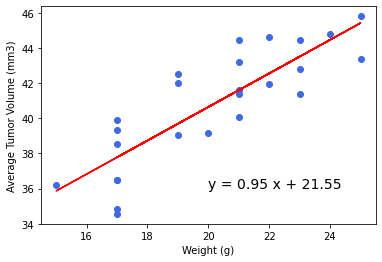

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capo_regimen['Weight (g)'],capo_regimen['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capo_regimen["Weight (g)"],capo_regimen["Tumor Volume (mm3)"])
regress_values=capo_regimen["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capo_regimen["Weight (g)"],capo_regimen["Tumor Volume (mm3)"],color='royalblue')
plt.plot(capo_regimen["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
